# Video Game Sales with Metacritic Ratings and Comments
This dataset is a combination of Gregory Smiths's web scrape of VGChartz's video game sales with accompanying variables from a web scrape of Metacritic by Rush Kirubi. VGChartz is a video game sales tracking website, and Metacritic is a review aggregator for movies, TV shows, music albums, and video games. 

Sources: https://www.kaggle.com/gregorut/videogamesales  
&emsp;&emsp;&emsp;&emsp;https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings, accessed on July 26th, 2020. 
 
The Metacritic scraper is based on https://github.com/wtamu-cisresearch/scraper, and the VGChartz scraper is available at https://github.com/GregorUT/vgchartzScrape, and is based on BeautifulSoup.

Not all of the VGChartz observations have accompanying Metacritic data, as Metacritic does not cover all video game platforms. Those that are covered may not have complete Metacritic data.
There are around 6,900 observations with complete VGChartz and Metacritic data.

The data are through December 22nd, 2016.

## Libraries
This analysis will use the python libraries pandas, numpy, matplotlib, and seaborn.

In [ ]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try:
    import seaborn as sns
    print("Module 'seaborn' is installed")
except ModuleNotFoundError:
    %pip install seaborn
    import seaborn as sns
    
import matplotlib.ticker as tick

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # Print multiple output in one cell

import datetime



## Summarizing the Data

### Reading in the Data

In [ ]:
#Read in data
df = pd.read_csv("Datasets/Video_Games_Sales_as_at_22_Dec_2016.csv")

### First Look
First, let's take a look at the data:

In [43]:
#Display top 50 rows
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


#

In [ ]:
df.describe()
df.dtypes

## Regional Game Sales
We have available sales data from North America, Europe, and Japan. What are the differences between the regions?

In [ ]:
fig, ax = plt.subplots()

dfYear = df.groupby(by = ["Year_of_Release"]).sum()
dfYear = dfYear.reset_index() #Puts year of release back in as a column

dropYears = [2017, 2018, 2019, 2020] #Data is only through December of 2016
dfYear = dfYear[~dfYear["Year_of_Release"].isin(dropYears)] #Keep only the years outside of the drop years

ax.set_ylabel("Sales (in millions)")
ax.set_xlabel("Year of Release")
ax.set_title("Regional Video Games Sales")

ax.plot(dfYear["Year_of_Release"], dfYear["NA_Sales"], label = "North American Sales")
ax.plot(dfYear["Year_of_Release"], dfYear["EU_Sales"], label = "European Sales")
ax.plot(dfYear["Year_of_Release"], dfYear["JP_Sales"], label = "Japanese Sales")

ax.legend()

Japan makes up a significant amount of sales, particularly prior to 2000, despite having a much lower population than both North America and Europe. Despite its size, Europe has lower sales than one might expect.

In [ ]:
#Group by Year and Genre, getting sum totals, and filter to 2000-2011

dfCatYear = df.groupby(by = ["Year_of_Release", "Genre"]).sum()
dfCatYear = dfCatYear.reset_index()
dfCatYear.head(5)

dfCatYear2000s = dfCatYear[dfCatYear["Year_of_Release"].isin([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011])]
dfCatYear2000s.dtypes
#dfCatYear2000s = pd.to_datetime(dfCatYear2000s["Year_of_Release"])

In [ ]:
#Create arrays for heatmaps by region, and create heatmaps
arrayJP = dfCatYear2000s.pivot("Genre", "Year_of_Release", "JP_Sales")
arrayNA = dfCatYear2000s.pivot("Genre", "Year_of_Release", "NA_Sales")
arrayEU = dfCatYear2000s.pivot("Genre", "Year_of_Release", "EU_Sales")

fig, ax = plt.subplots(1, 3)
fig.set_figwidth(19.2)
fig.set_figheight(10.8)
fig.tight_layout(pad = 10)

xLabels = []
for i in range(12):
    if i < 10:
        xLabels.append("200" + str(i))
    else:
        xLabels.append("20" + str(i))

ax1 = sns.heatmap(arrayJP, ax=ax[0], square = True)
ax1.invert_yaxis()
ax1.set_title("Japanese Game Sales (in millions)")
ax1.set(xlabel="Year of Release")
ax1.set_xticklabels(xLabels)

ax2 = sns.heatmap(arrayNA, ax=ax[1], square = True)
ax2.invert_yaxis()
ax2.set_title("North American Game Sales (in millions)")
ax2.set(xlabel="Year of Release")
ax2.set_xticklabels(xLabels)

ax3 = sns.heatmap(arrayEU, ax=ax[2], square = True)
ax3.invert_yaxis()
ax3.set_title("European Game Sales (in millions)")
ax3.set(xlabel="Year of Release")
ax3.set_xticklabels(xLabels)

Japanese gamers prefer Role-Playing games, like Pokémon and Dragon Quest, over other genres. Both North America and Europe prefer Action games and Sports games. What are the top selling games for each region?

In [58]:
dfTop5NA = df.nlargest(5, "NA_Sales", keep = "all")
dfTop5NA.head()

dfTop5EU = df.nlargest(5, "EU_Sales", keep = "all")
dfTop5EU.head()

dfTop5JP = df.nlargest(5, "JP_Sales", keep = "all")
dfTop5JP.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,NaN,NaN,NaN
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.74,9.20,4.16,2.04,20.15,77.0,58.0,7.9,50.0,Nintendo,E


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,NaN,NaN,NaN,NaN,NaN,NaN
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.38,4.46,6.04,1.36,18.25,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\arqui\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Name', ylabel='JP_Sales'>

C:\Users\arqui\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 170.9, 'Game')

Text(316.72499999999997, 0.5, 'Sales (in millions')

[Text(0, 0, 'Wii Sports'),
 Text(1, 0, 'Super Mario Bros.'),
 Text(2, 0, 'Duck Hunt'),
 Text(3, 0, 'Tetris'),
 Text(4, 0, 'Mario Kart Wii')]

Text(0.5, 1.0, 'Top 5 North American Games')

C:\Users\arqui\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 170.9, 'Game')

Text(1072.9791176470587, 0.5, 'Sales (in millions')

[Text(0, 0, 'Wii Sports'),
 Text(1, 0, 'Mario Kart Wii'),
 Text(2, 0, 'Nintendogs'),
 Text(3, 0, 'Wii Sports Resort'),
 Text(4, 0, 'Brain Age: Train Your Brain in Minutes a Day')]

Text(0.5, 1.0, 'Top 5 European Games')

C:\Users\arqui\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 170.9, 'Game')

Text(1829.2332352941175, 0.5, 'Sales (in millions')

[Text(0, 0, 'Pokemon Red/Pokemon Blue'),
 Text(1, 0, 'Pokemon Gold/Pokemon Silver'),
 Text(2, 0, 'Super Mario Bros.'),
 Text(3, 0, 'New Super Mario Bros.'),
 Text(4, 0, 'Pokemon Diamond/Pokemon Pearl')]

Text(0.5, 1.0, 'Top 5 Japanese Games')

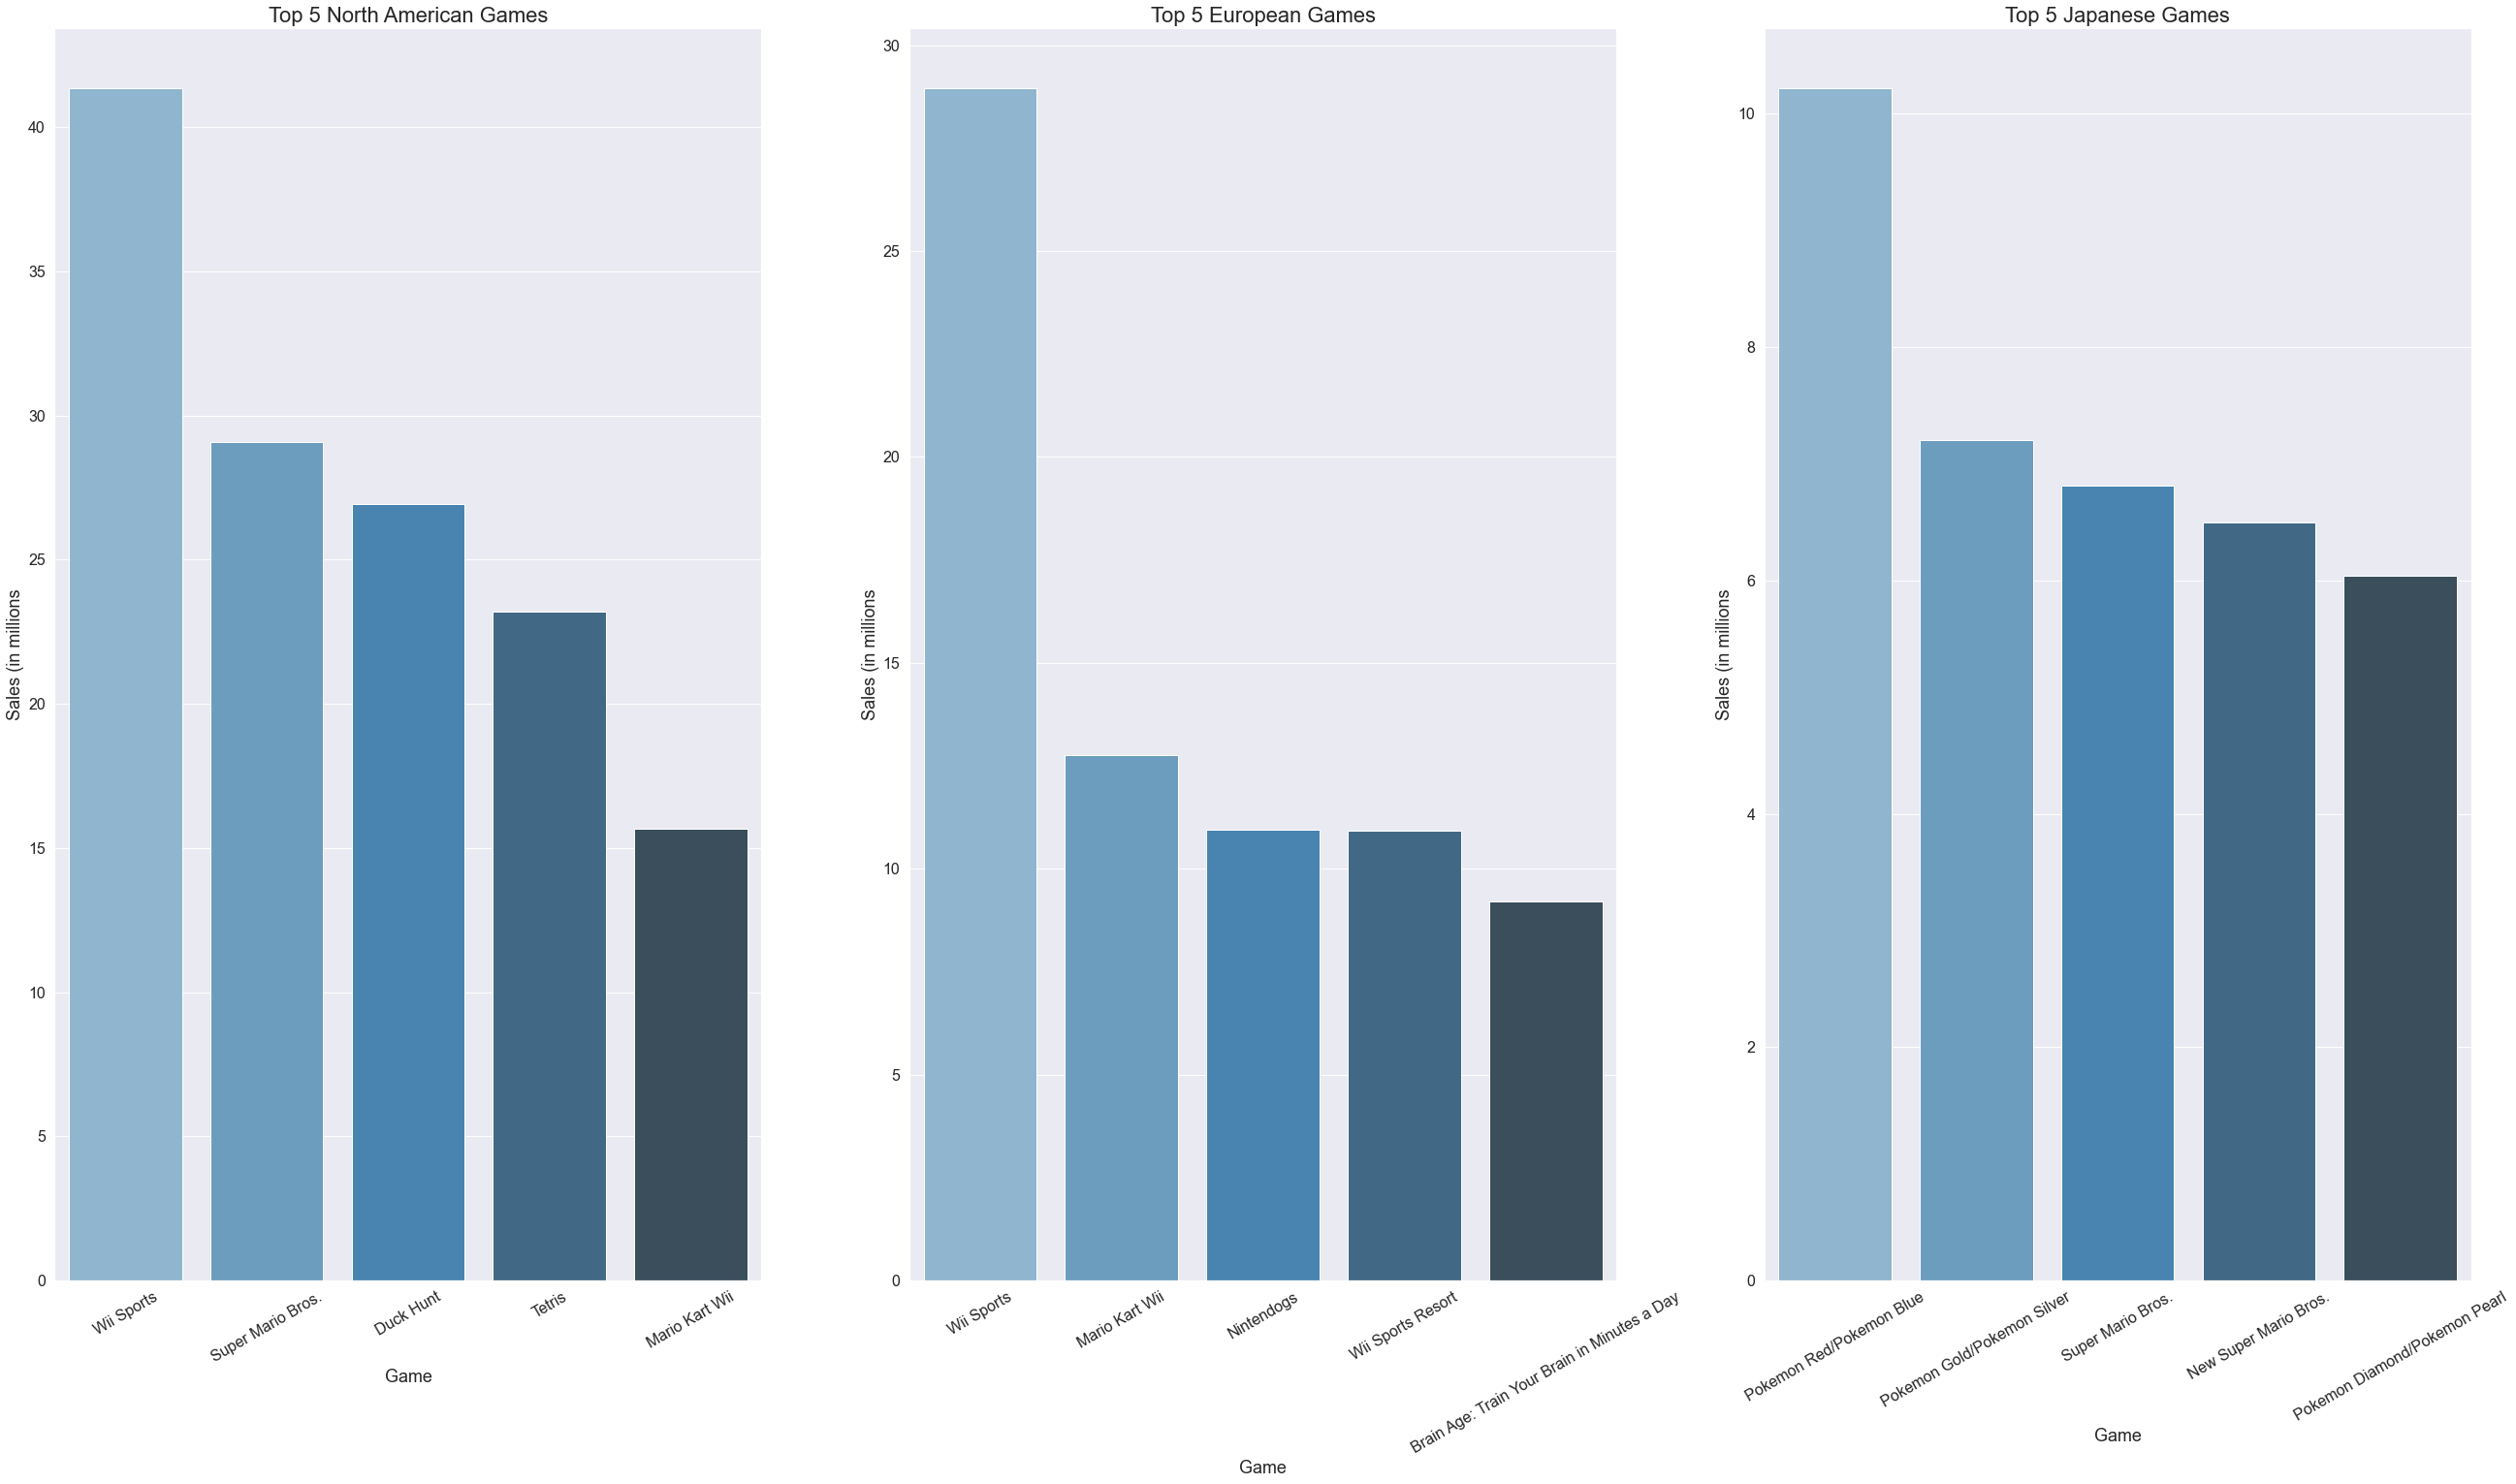

In [99]:
fig, ax = plt.subplots(1, 3)

fig.set_figwidth(38.40)
fig.set_figheight(21.6)
fig.tight_layout(pad = 10)

sns.barplot(dfTop5JP["Name"], dfTop5NA["JP_Sales"])

ax1 = sns.barplot(dfTop5NA["Name"], dfTop5NA["NA_Sales"], ax = ax[0], palette=("Blues_d"))
ax1.set_xlabel("Game", fontsize = 18)
ax1.set_ylabel("Sales (in millions", fontsize = 18)
ax1.set_xticklabels(dfTop5NA["Name"], fontsize = 16, rotation = 30)
ax1.tick_params(axis = "y", labelsize = 16)
ax1.set_title("Top 5 North American Games", fontsize = 22)

ax2 = sns.barplot(dfTop5EU["Name"], dfTop5EU["EU_Sales"], ax = ax[1], palette=("Blues_d"))
ax2.set_xlabel("Game", fontsize = 18)
ax2.set_ylabel("Sales (in millions", fontsize = 18)
ax2.set_xticklabels(dfTop5EU["Name"], fontsize = 16, rotation = 30)
ax2.tick_params(axis = "y", labelsize = 16)
ax2.set_title("Top 5 European Games", fontsize = 22)

ax3 = sns.barplot(dfTop5JP["Name"], dfTop5JP["JP_Sales"], ax = ax[2], palette=("Blues_d"))
ax3.set_xlabel("Game", fontsize = 18)
ax3.set_ylabel("Sales (in millions", fontsize = 18)
ax3.set_xticklabels(dfTop5JP["Name"], fontsize = 16, rotation = 30)
ax3.tick_params(axis = "y", labelsize = 16)
ax3.set_title("Top 5 Japanese Games", fontsize = 22)

sns.set_theme()
#sns.axes_style("darkgrid")